# Optimization with constraints

In this example we are going to expose methods to solve a generic optimization problem in the form

$$\min_{x\in B} f(x) \\
    g(x) = 0 \\
    h(x) \ge 0$$
    

In [10]:
from __future__ import print_function
import openturns as ot
import math as m

In [11]:
# define the objective function
objective = ot.SymbolicFunction(['x1', 'x2', 'x3', 'x4'], ['x1 + 2 * x2 - 3 * x3 + 4 * x4'])

In [12]:
# define the constraints
inequality_constraint = ot.SymbolicFunction(['x1', 'x2', 'x3', 'x4'], ['x1-x3'])

In [13]:
# define the problem bounds
dim = objective.getInputDimension()
bounds = ot.Interval([-3.] * dim, [5.] * dim)

In [14]:
# define the problem
problem = ot.OptimizationProblem(objective)
problem.setMinimization(True)
problem.setInequalityConstraint(inequality_constraint)
problem.setBounds(bounds)

In [15]:
# solve the problem
algo = ot.Cobyla()
algo.setProblem(problem)
startingPoint = [0.0] * dim
algo.setStartingPoint(startingPoint)
algo.run()

In [16]:
# retrieve results
result = algo.getResult()
print('x^=', result.getOptimalPoint())

x^= [4.47847,-3,4.47847,-3]


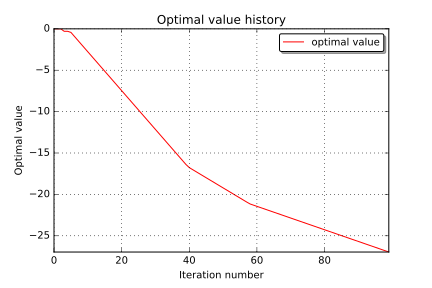

In [17]:
# draw optimal value history
result.drawOptimalValueHistory()